In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import pearsonr

In [8]:
def analyze_eye_gaze_data(file_path):
    """
    Analyzes eye gaze data from a CSV file.

    Args:
        file_path (str): The path to the CSV file.

    Returns:
        pandas.DataFrame: A DataFrame containing the analyzed data, or None if an error occurs.
    """
    try:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_path)

        # --- Data Cleaning and Preprocessing ---

        # Convert timestamp to datetime objects
        df['Timestamp'] = pd.to_datetime(df['Timestamp'])
        df.loc[~(df==0).all(axis=1)]

        # Handle potential issues (e.g., missing values, outliers)
        df.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace infinity with NaN
        df.dropna(inplace=True)  # Remove rows with NaN values

        # --- Descriptive Statistics ---

        print("\n--- Descriptive Statistics ---\n")
        print(df.describe())

        # --- Analysis of Phoria ---

        print("\n--- Phoria Analysis ---\n")

        # Overall Phoria Analysis
        print("\nOverall Phoria:")
        print(f"  Mean: {df['OverallPhoria'].mean():.3f}")
        print(f"  Median: {df['OverallPhoria'].median():.3f}")
        print(f"  Standard Deviation: {df['OverallPhoria'].std():.3f}")
        print(f"  Min: {df['OverallPhoria'].min():.3f}")
        print(f"  Max: {df['OverallPhoria'].max():.3f}")


        # Left Phoria Analysis
        print("\nLeft Phoria:")
        print(f"  Mean: {df['LeftPhoria'].mean():.3f}")
        print(f"  Median: {df['LeftPhoria'].median():.3f}")
        print(f"  Standard Deviation: {df['LeftPhoria'].std():.3f}")
        print(f"  Min: {df['LeftPhoria'].min():.3f}")
        print(f"  Max: {df['LeftPhoria'].max():.3f}")

        # Right Phoria Analysis
        print("\nRight Phoria:")
        print(f"  Mean: {df['RightPhoria'].mean():.3f}")
        print(f"  Median: {df['RightPhoria'].median():.3f}")
        print(f"  Standard Deviation: {df['RightPhoria'].std():.3f}")
        print(f"  Min: {df['RightPhoria'].min():.3f}")
        print(f"  Max: {df['RightPhoria'].max():.3f}")

        # --- Analysis by Target Name ---

        print("\n--- Phoria Analysis by Target Name ---\n")
        for target_name in df['TargetName'].unique():
            target_df = df[df['TargetName'] == target_name]
            print(f"\nTarget: {target_name}")
            print(f"  Average Overall Phoria: {target_df['OverallPhoria'].mean():.3f}")
            print(f"  Average Left Phoria: {target_df['LeftPhoria'].mean():.3f}")
            print(f"  Average Right Phoria: {target_df['RightPhoria'].mean():.3f}")

        # --- Time Series Analysis ---

        print("\n--- Time Series Analysis ---\n")

        # Example: Plot overall phoria over time
        plt.figure(figsize=(12, 6))
        plt.plot(df['Timestamp'], df['OverallPhoria'], label='Overall Phoria')
        plt.xlabel('Timestamp')
        plt.ylabel('Phoria (Diopters)')
        plt.title('Overall Phoria Over Time')
        plt.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # --- Distribution Analysis (Histograms) ---
        print("\n--- Distribution Analysis ---\n")

        # Example: Histogram of Left Phoria
        plt.figure(figsize=(10, 5))
        plt.hist(df['LeftPhoria'], bins=20, edgecolor='black')
        plt.title('Distribution of Left Phoria')
        plt.xlabel('Left Phoria (Diopters)')
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()

        # Example: Histogram of Right Phoria
        plt.figure(figsize=(10, 5))
        plt.hist(df['RightPhoria'], bins=20, edgecolor='black')
        plt.title('Distribution of Right Phoria')
        plt.xlabel('Right Phoria (Diopters)')
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()

        # --- Gaze Direction and Position Analysis ---

        print("\n--- Gaze Direction and Position Analysis ---\n")

        # Example: Calculate mean gaze direction for each eye
        print("\nMean Left Eye Direction:")
        print(f"  X: {df['LeftEyeDirX'].mean():.3f}")
        print(f"  Y: {df['LeftEyeDirY'].mean():.3f}")
        print(f"  Z: {df['LeftEyeDirZ'].mean():.3f}")

        print("\nMean Right Eye Direction:")
        print(f"  X: {df['RightEyeDirX'].mean():.3f}")
        print(f"  Y: {df['RightEyeDirY'].mean():.3f}")
        print(f"  Z: {df['RightEyeDirZ'].mean():.3f}")

        print("\nMean Left Eye Position:")
        print(f"  X: {df['LeftEyePosX'].mean():.3f}")
        print(f"  Y: {df['LeftEyePosY'].mean():.3f}")
        print(f"  Z: {df['LeftEyePosZ'].mean():.3f}")

        print("\nMean Right Eye Position:")
        print(f"  X: {df['RightEyePosX'].mean():.3f}")
        print(f"  Y: {df['RightEyePosY'].mean():.3f}")
        print(f"  Z: {df['RightEyePosZ'].mean():.3f}")

        print("\nMean Vergence Point:")
        print(f"  X: {df['VergencePointX'].mean():.3f}")
        print(f"  Y: {df['VergencePointY'].mean():.3f}")
        print(f"  Z: {df['VergencePointZ'].mean():.3f}")

        # Example: Target center mean values.
        print("\nMean Target Center Position:")
        print(f"  X: {df['TargetCenterX'].mean():.3f}")
        print(f"  Y: {df['TargetCenterY'].mean():.3f}")
        print(f"  Z: {df['TargetCenterZ'].mean():.3f}")

        # --- Advanced Analyses ---

        print("\n--- Advanced Analyses ---\n")

        # 1. Correlation Analysis: Phoria vs. Vergence Distance
        print("\n1. Correlation Analysis: Phoria vs. Vergence Distance")
        df['VergenceDistance'] = np.sqrt(df['VergencePointX']**2 + df['VergencePointY']**2 + df['VergencePointZ']**2)
        correlation, p_value = pearsonr(df['OverallPhoria'], df['VergenceDistance'])
        print(f"   Correlation (Overall Phoria vs. Vergence Distance): {correlation:.3f}")
        print(f"   P-value: {p_value:.3f}")
        #Interpret the results.
        if p_value < 0.05:
            print("   There is a statistically significant correlation between Overall Phoria and Vergence Distance.")
        else:
            print("   There is no statistically significant correlation between Overall Phoria and Vergence Distance.")
        
        correlation, p_value = pearsonr(df['LeftPhoria'], df['VergenceDistance'])
        print(f"   Correlation (Left Phoria vs. Vergence Distance): {correlation:.3f}")
        print(f"   P-value: {p_value:.3f}")
        #Interpret the results.
        if p_value < 0.05:
            print("   There is a statistically significant correlation between Left Phoria and Vergence Distance.")
        else:
            print("   There is no statistically significant correlation between Left Phoria and Vergence Distance.")

        correlation, p_value = pearsonr(df['RightPhoria'], df['VergenceDistance'])
        print(f"   Correlation (Right Phoria vs. Vergence Distance): {correlation:.3f}")
        print(f"   P-value: {p_value:.3f}")
        #Interpret the results.
        if p_value < 0.05:
            print("   There is a statistically significant correlation between Right Phoria and Vergence Distance.")
        else:
            print("   There is no statistically significant correlation between Right Phoria and Vergence Distance.")

        
        #3. Vergence Point Scatter Plot with Target Center
        print("\n3. Vergence Point Scatter Plot with Target Center")
        plt.figure(figsize=(8, 8))
        plt.scatter(df['VergencePointX'], df['VergencePointY'], label='Vergence Points', alpha=0.5)
        plt.scatter(df['TargetCenterX'].mean(), df['TargetCenterY'].mean(), color='red', marker='x', s=200, label='Mean Target Center')
        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.title('Vergence Point Scatter Plot with Mean Target Center')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # 4. Gaze Direction Scatter Plot
        print("\n4. Gaze Direction Scatter Plot")
        plt.figure(figsize=(8, 8))
        plt.scatter(df['LeftEyeDirX'], df['LeftEyeDirY'], label='Left Eye Direction', alpha=0.5)
        plt.scatter(df['RightEyeDirX'], df['RightEyeDirY'], label='Right Eye Direction', alpha=0.5)
        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.title('Gaze Direction Scatter Plot')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # --- Additional Analyses ---

        # You can add more sophisticated analyses here:
        # - More detailed analysis of misalignment types.
        # - Comparing different targets or conditions.
        # - Machine learning models to classify or predict misalignment.

        return df

    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: File at {file_path} is empty.")
        return None
    except pd.errors.ParserError:
        print(f"Error: Could not parse the file at {file_path}. Check the file format.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None

In [9]:
def main():
    """
    Main function to run the eye gaze data analysis.
    """
    # Choose a file to analyze or analyze all files in a directory
    # Example 1: Analyze a single file
    file_path = "C:\\Users\\dylan\\AppData\\LocalLow\\DefaultCompany\\binoclear_insight\\eyegaze_log_20250228_184658.csv"  # Replace with the actual file path
    analyze_eye_gaze_data(file_path)

    # # Example 2: Analyze all CSV files in a directory:
    # data_directory = "C:\\Users\\dylan\\AppData\\LocalLow\\DefaultCompany\\binoclear_insight"

    # for filename in os.listdir(data_directory):
    #     if filename.startswith("eyegaze_log") and filename.endswith(".csv"):
    #         print(f"\n\nAnalyzing file: {filename}")
    #         file_path = os.path.join(data_directory, filename)
    #         analyze_eye_gaze_data(file_path)
    #         print("\n\nFinished analyzing file: ", filename)


--- Descriptive Statistics ---

                           Timestamp  LeftEyePosX  LeftEyePosY  LeftEyePosZ  \
count                           5189  5189.000000  5189.000000  5189.000000   
mean   2025-02-28 18:47:31.276264704    -0.021321     1.182591     0.084135   
min       2025-02-28 18:47:01.249000    -0.031000     1.126000     0.038000   
25%       2025-02-28 18:47:16.824000    -0.024000     1.185000     0.074000   
50%    2025-02-28 18:47:31.283000064    -0.023000     1.187000     0.082000   
75%    2025-02-28 18:47:45.774000128    -0.019000     1.204000     0.085000   
max       2025-02-28 18:48:00.222000     0.057000     1.230000     0.121000   
std                              NaN     0.008173     0.031108     0.020765   

       LeftEyeDirX  LeftEyeDirY  LeftEyeDirZ  RightEyePosX  RightEyePosY  \
count  5189.000000  5189.000000  5189.000000   5189.000000   5189.000000   
mean      0.029293     0.003660     0.779346      0.043527      1.182557   
min      -0.328000    -0.95

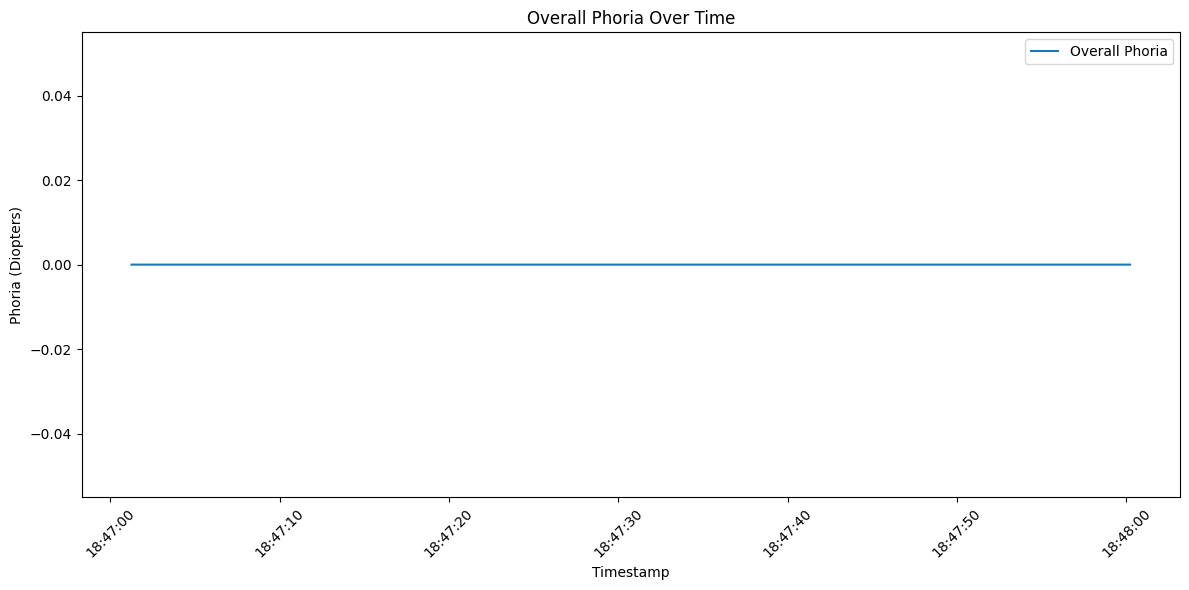


--- Distribution Analysis ---



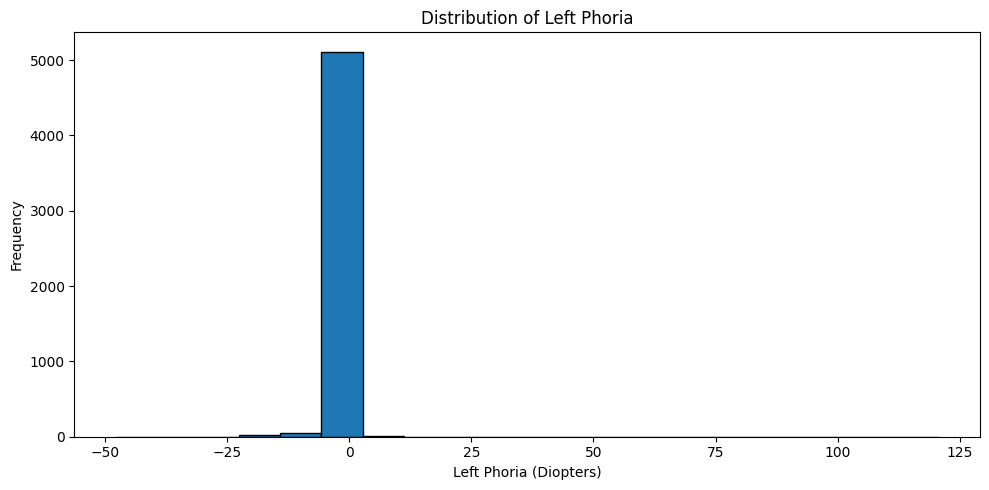

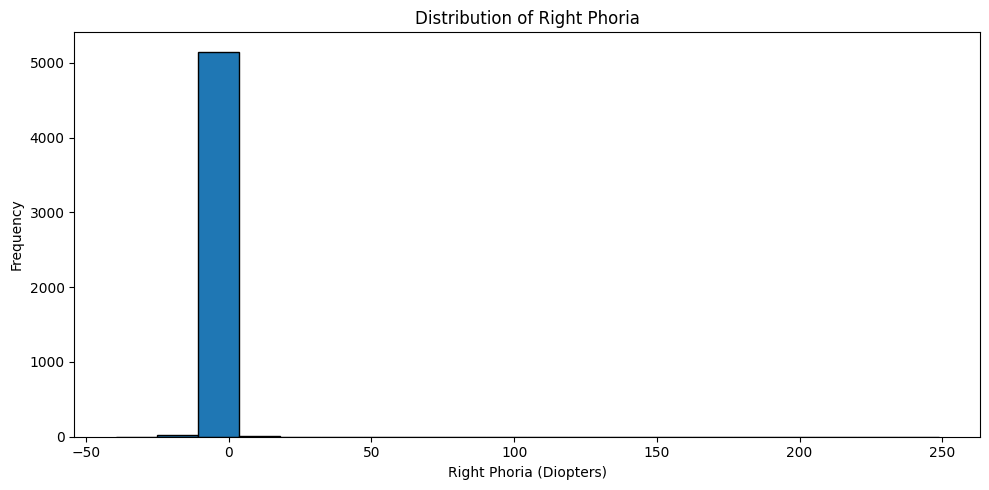


--- Gaze Direction and Position Analysis ---


Mean Left Eye Direction:
  X: 0.029
  Y: 0.004
  Z: 0.779

Mean Right Eye Direction:
  X: -0.024
  Y: 0.004
  Z: 0.778

Mean Left Eye Position:
  X: -0.021
  Y: 1.183
  Z: 0.084

Mean Right Eye Position:
  X: 0.044
  Y: 1.183
  Z: 0.087

Mean Vergence Point:
  X: 0.014
  Y: 1.188
  Z: 1.022

Mean Target Center Position:
  X: 0.011
  Y: 1.971
  Z: 2.336

--- Advanced Analyses ---


1. Correlation Analysis: Phoria vs. Vergence Distance
   Correlation (Overall Phoria vs. Vergence Distance): nan
   P-value: nan
   There is no statistically significant correlation between Overall Phoria and Vergence Distance.
   Correlation (Left Phoria vs. Vergence Distance): 0.068
   P-value: 0.000
   There is a statistically significant correlation between Left Phoria and Vergence Distance.
   Correlation (Right Phoria vs. Vergence Distance): 0.024
   P-value: 0.084
   There is no statistically significant correlation between Right Phoria and Vergence Dista

C:\Users\dylan\AppData\Local\Temp\ipykernel_26228\1098133417.py:148: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, p_value = pearsonr(df['OverallPhoria'], df['VergenceDistance'])


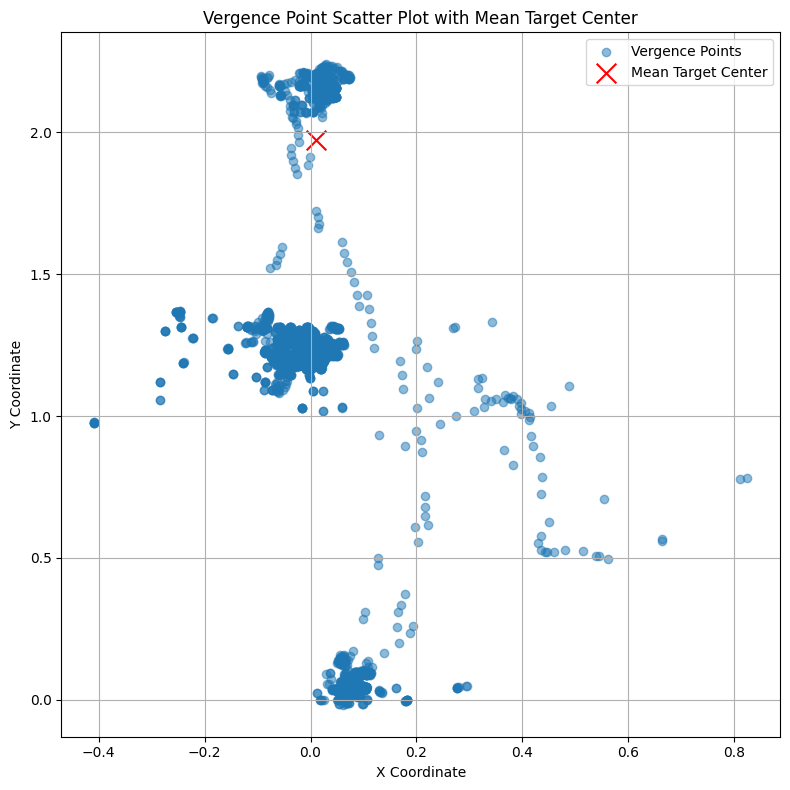


4. Gaze Direction Scatter Plot


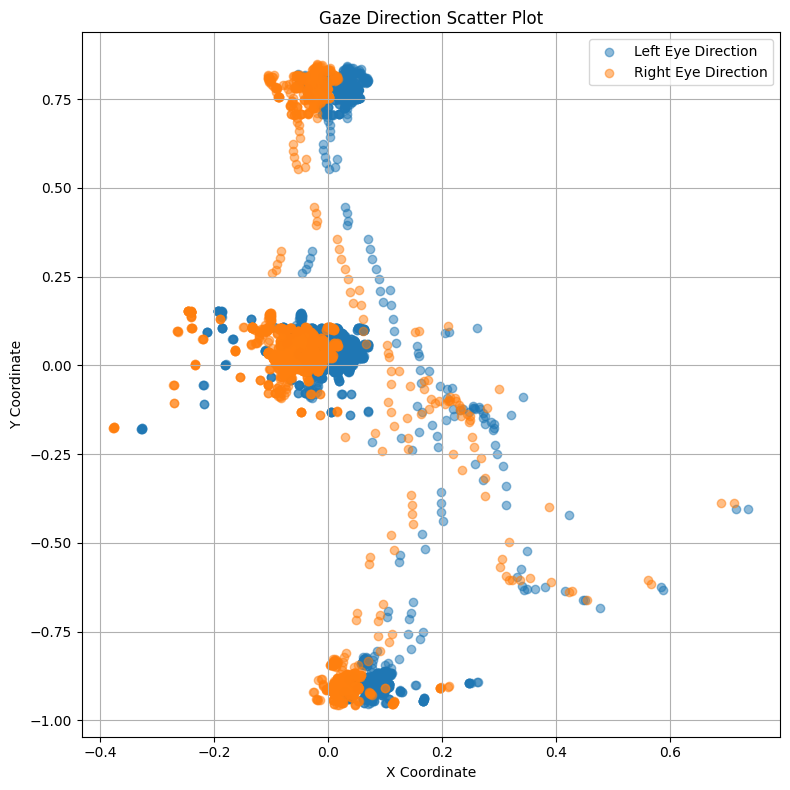

In [10]:
if __name__ == "__main__":
    main()